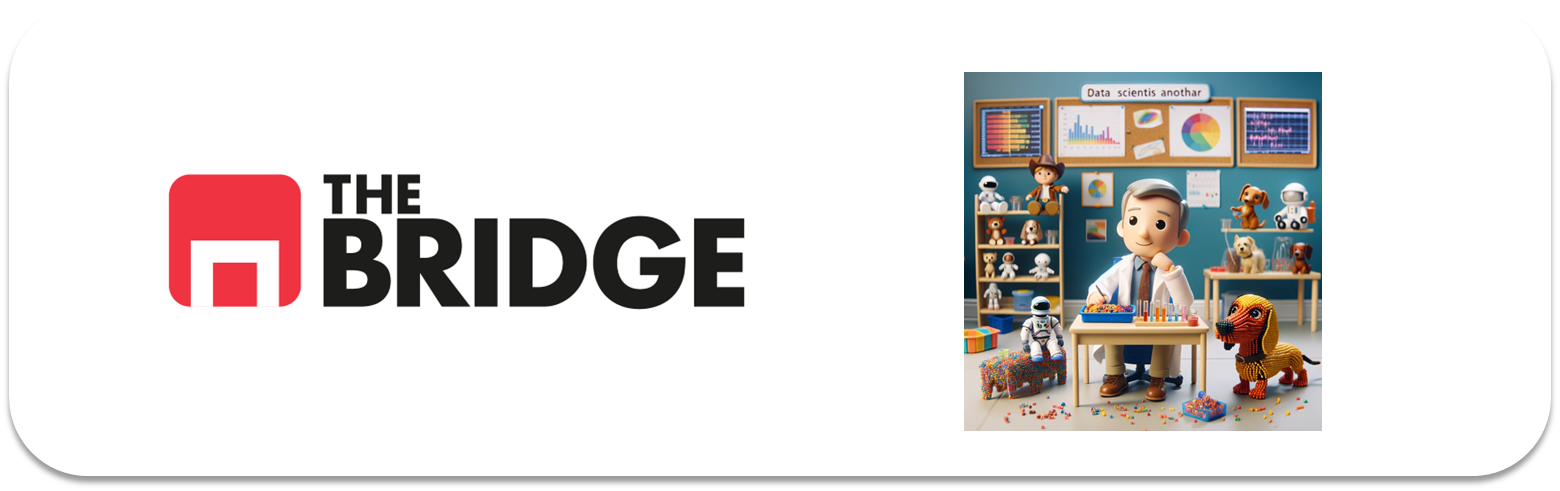

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [29]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import bootcampviztools as bvt




### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [30]:
sns.get_dataset_names()
df_titanic =sns.load_dataset("titanic")

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [31]:
#df_titanic = pd.read_csv("./data/titanic.csv")
#pd.set_option("display.max_columns", None)
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [32]:
df_titanic_copia = df_titanic.copy()
porcentaje_nulos = (df_titanic.isnull().sum() / len(df_titanic)) * 100
porcentaje_nulos


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [33]:
age_medias = df_titanic.groupby(['sex', 'pclass'])['age'].transform('mean')
df_titanic['age'] = df_titanic['age'].fillna(age_medias)
moda_embarked = df_titanic['embarked'].mode()[0]
df_titanic['embarked'] = df_titanic['embarked'].fillna(moda_embarked)
df_titanic['embark_town'] = df_titanic['embark_town'].fillna(moda_embarked)

In [34]:
df_titanic = df_titanic.drop('parch', axis=1)
df_titanic = df_titanic.drop('deck', axis=1)
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.00,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.00,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.00,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.00,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.00,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.00,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,21.75,1,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.00,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [35]:
porcentaje_nulos = (df_titanic.isnull().sum() / len(df_titanic)) * 100
porcentaje_nulos

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| - survived   | numero de supervivientes que viajaba juntos- |
| - pclass    |-La clase (como en la pelicula) |
| - Sex    |- El genero|
| - Age     |- La edad|
| - sibsp   |-Cuantos familiares viajaban con al pesona |
| - fare    |- lo que pagó|
| - Embarked    |- La inicial de la ciudad en la que embarcó |
| - class     |- la clase, pero en letra |
| - who     |- man o woman |
| - adult_male  |- Booleano don true es hombre|
| - embark_town  |- ciudad de embarque|
| - alive  |- booleano de si sigue vivo |
| - alone  |- |








### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [36]:
df_titanic["embarked"] = df_titanic["embarked"].replace({"C": "Cherburgo", "S": "Southampton", "Q": "Cobh"})
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.00,1,7.2500,Southampton,Third,man,True,Southampton,no,False
1,1,1,female,38.00,1,71.2833,Cherburgo,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.00,0,7.9250,Southampton,Third,woman,False,Southampton,yes,True
3,1,1,female,35.00,1,53.1000,Southampton,First,woman,False,Southampton,yes,False
4,0,3,male,35.00,0,8.0500,Southampton,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,13.0000,Southampton,Second,man,True,Southampton,no,True
887,1,1,female,19.00,0,30.0000,Southampton,First,woman,False,Southampton,yes,True
888,0,3,female,21.75,1,23.4500,Southampton,Third,woman,False,Southampton,no,False
889,1,1,male,26.00,0,30.0000,Cherburgo,First,man,True,Cherbourg,yes,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [37]:
df_titanic_util = df_titanic.loc[:, ["survived", "who", "age", "fare", "class", "embarked", "alone"]]
df_titanic_util

,survived,who,age,fare,class,embarked,alone
0,0,man,22.00,7.2500,Third,Southampton,False
1,1,woman,38.00,71.2833,First,Cherburgo,False
2,1,woman,26.00,7.9250,Third,Southampton,True
3,1,woman,35.00,53.1000,First,Southampton,False
4,0,man,35.00,8.0500,Third,Southampton,True
...,...,...,...,...,...,...,...
886,0,man,27.00,13.0000,Second,Southampton,True
887,1,woman,19.00,30.0000,First,Southampton,True
888,0,woman,21.75,23.4500,Third,Southampton,False
889,1,man,26.00,30.0000,First,Cherburgo,True


In [38]:
def cardinalidad (df_in, umbral_cardi, umbral_porce):
    df_tipificacion = pd.DataFrame([df_in.nunique(), df_in.nunique()/len(df_in) * 100, df_in.dtypes]).T.rename(columns = {0: "Cardinalidad", 1: "%_Cardinalidad", 2: "Tipo"})
    df_tipificacion["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
    df_tipificacion.loc[df_tipificacion.Cardinalidad == 2, "Clasificada_como"] = "Binaria"
    df_tipificacion.loc[df_tipificacion["Cardinalidad"] > umbral_cardi, "Clasificada_como"] ="Numerica Discreta"
    df_tipificacion.loc[df_tipificacion["%_Cardinalidad"] > umbral_porce, "Clasificada_como"] = "Numerica Continua"
    return df_tipificacion
eldos = cardinalidad(df_titanic_util,10,30)
eldos


,Cardinalidad,%_Cardinalidad,Tipo,Clasificada_como
survived,2,0.224467,int64,Binaria
who,3,0.3367,object,Categorica
age,94,10.549944,float64,Numerica Discreta
fare,248,27.833895,float64,Numerica Discreta
class,3,0.3367,category,Categorica
embarked,3,0.3367,object,Categorica
alone,2,0.224467,bool,Binaria


In [39]:
categoricas = []
numericas = []
for indice, fila in eldos.iterrows():
    clasificacion = fila['Clasificada_como']
    if clasificacion == "Categorica" or clasificacion == "Binaria":
        categoricas.append(indice)
    else:
        numericas.append(indice)
print("categoricas:", categoricas)
print("numéricas", numericas)

categoricas: ['survived', 'who', 'class', 'embarked', 'alone']
numéricas ['age', 'fare']


In [40]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


In [41]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


In [42]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [43]:
df_titanic_util_categoricas = df_titanic_util[categoricas]
df_titanic_util_numericas = df_titanic_util[numericas]

### #2.1 Categóricas

In [44]:
print("La moda para las categoricas es:")
df_titanic_util_categoricas.mode().T


La moda para las categoricas es:


,0
survived,0
who,man
class,Third
embarked,Southampton
alone,True


In [45]:
print("Para cada variable categorica,las frecuencias absolutas son:")
for catego in categoricas:
    print(f"Para {catego}")
    print(df_titanic_util[catego].value_counts())
    print("\n*1")

Para cada variable categorica,las frecuencias absolutas son:
Para survived
survived
0    549
1    342
Name: count, dtype: int64

*1
Para who
who
man      537
woman    271
child     83
Name: count, dtype: int64

*1
Para class
class
Third     491
First     216
Second    184
Name: count, dtype: int64

*1
Para embarked
embarked
Southampton    646
Cherburgo      168
Cobh            77
Name: count, dtype: int64

*1
Para alone
alone
True     537
False    354
Name: count, dtype: int64

*1


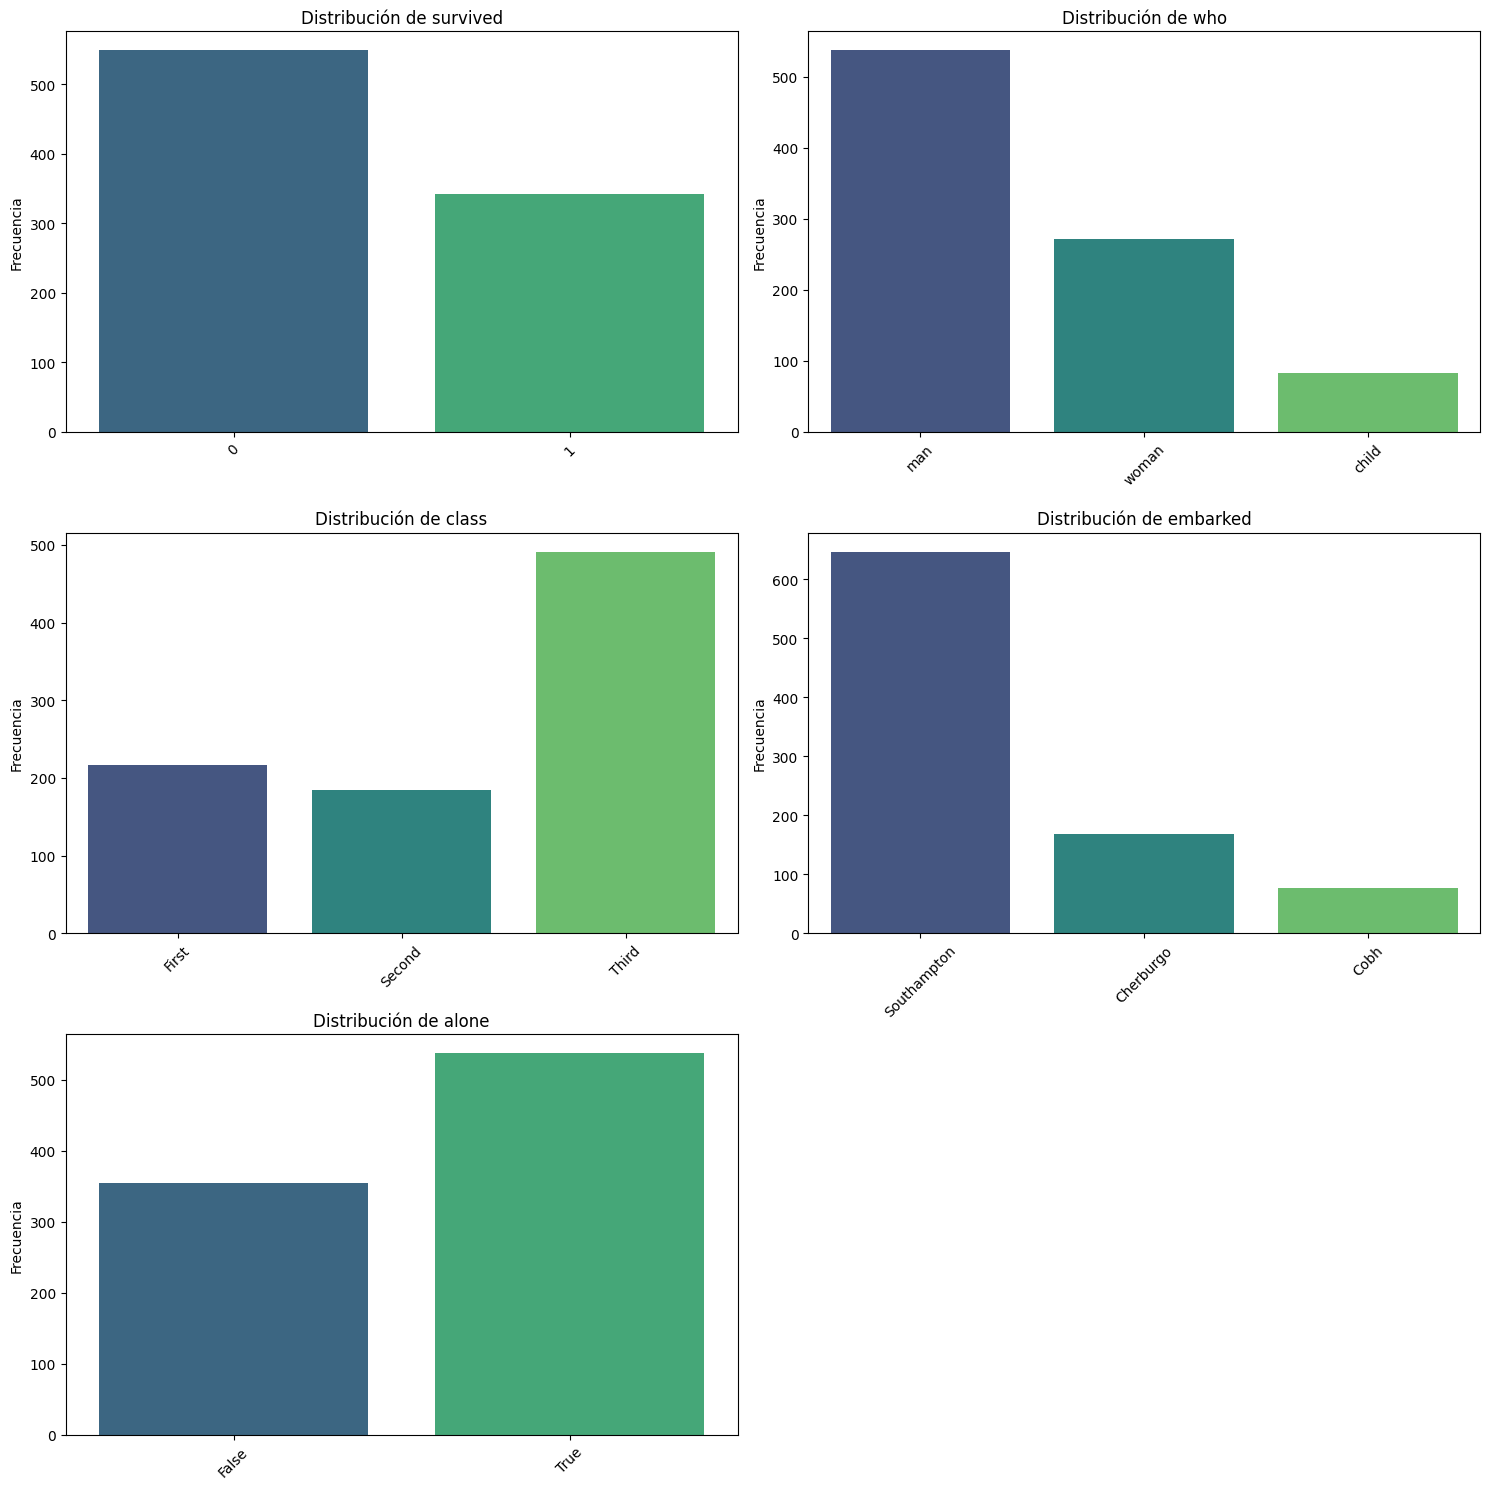

In [46]:
pinta_distribucion_categoricas(df_titanic_util, categoricas)

In [47]:
print("Para cada variable categorica,las frecuencias relativas son:")
for catego in categoricas:
    print(f"Para {catego}")
    print(df_titanic_util_categoricas[catego].value_counts()/len(df_titanic_util_categoricas)*100)
    print("\n*2")

Para cada variable categorica,las frecuencias relativas son:
Para survived
survived
0    61.616162
1    38.383838
Name: count, dtype: float64

*2
Para who
who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64

*2
Para class
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64

*2
Para embarked
embarked
Southampton    72.502806
Cherburgo      18.855219
Cobh            8.641975
Name: count, dtype: float64

*2
Para alone
alone
True     60.26936
False    39.73064
Name: count, dtype: float64

*2


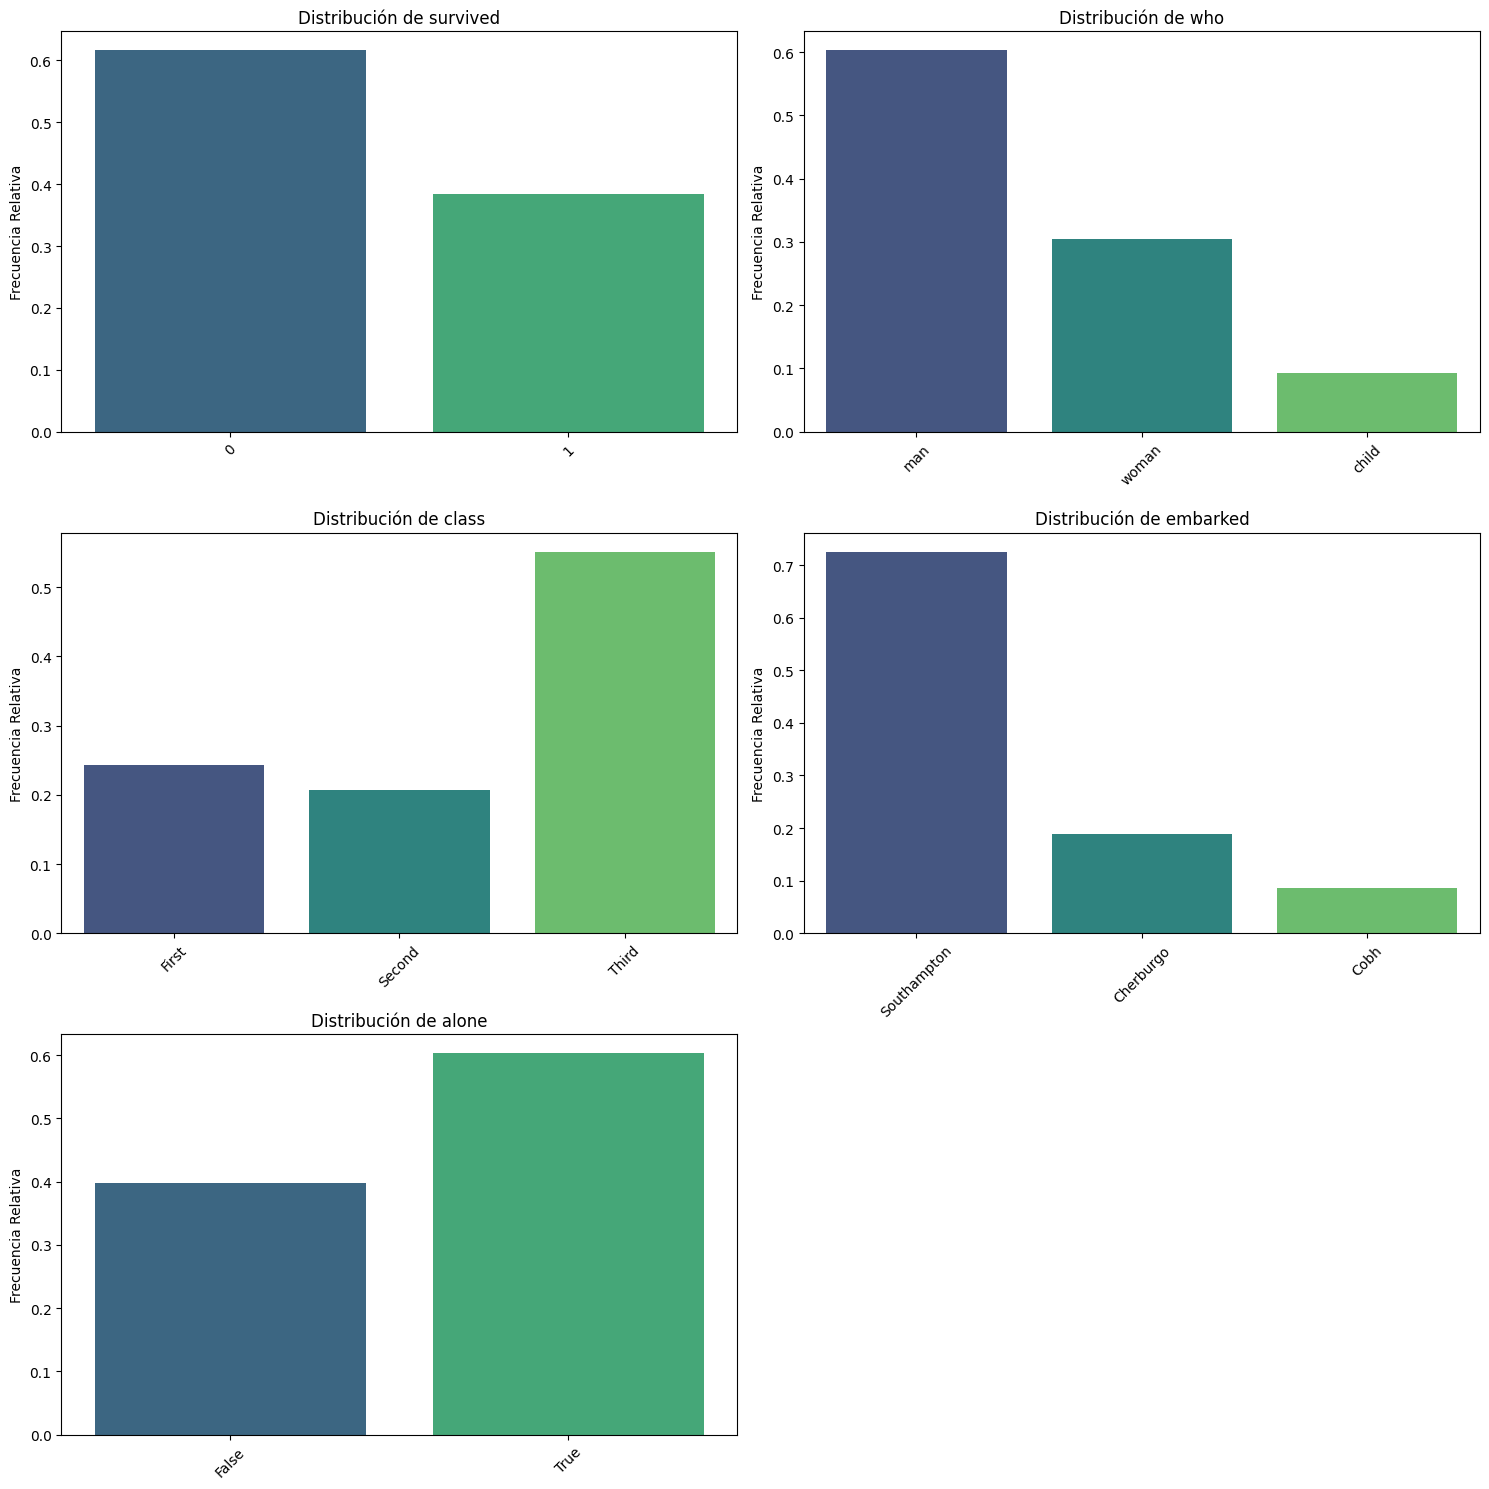

In [48]:
pinta_distribucion_categoricas(df_titanic_util, categoricas, relativa = True)

### #2.2 Numéricas

In [49]:

print("Las medias de las variables numéricas son:")
print(df_titanic_util_numericas.describe().loc["mean"])

print()
print("La mediana de las variables numéricas son:")
print(df_titanic_util_numericas.describe().loc["50%"])
print()

print("Los máximos de las variables numéricas son:")
print(df_titanic_util_numericas.describe().loc["max"])
print()

print("Los mínimos de las variables numéricas son:")
print(df_titanic_util_numericas.describe().loc["min"])


Las medias de las variables numéricas son:
age     29.318643
fare    32.204208
Name: mean, dtype: float64

La mediana de las variables numéricas son:
age     26.507589
fare    14.454200
Name: 50%, dtype: float64

Los máximos de las variables numéricas son:
age      80.0000
fare    512.3292
Name: max, dtype: float64

Los mínimos de las variables numéricas son:
age     0.42
fare    0.00
Name: min, dtype: float64


In [50]:
print(
    "El prencentil 90 de 'age' es:",df_titanic_util_numericas["age"].quantile(0.9), 
     "El prencentil 95 de 'age' es:",df_titanic_util_numericas["age"].quantile(0.95),
     )
print(
    "El prencentil 90 de 'fare' es:",df_titanic_util_numericas["age"].quantile(0.9), 
     "El prencentil 95 de 'fare' es:",df_titanic_util_numericas["age"].quantile(0.95),
     )

El prencentil 90 de 'age' es: 47.0 El prencentil 95 de 'age' es: 54.0
El prencentil 90 de 'fare' es: 47.0 El prencentil 95 de 'fare' es: 54.0


In [51]:
round((df_titanic_util_numericas.describe()), 3)

,age,fare
count,891.000,891.000
mean,29.319,32.204
std,13.281,49.693
min,0.420,0.000
25%,21.750,7.910
50%,26.508,14.454
75%,36.000,31.000
max,80.000,512.329


In [52]:
def get_IQR(df_util, col):
    return df_util[col].quantile(0.75) - df_util[col].quantile(0.25)
print("El rango intercuartílico para 'age' es:")
print(get_IQR(df_titanic_util_numericas,"age"))
print()
print("El rango intercuartílico para 'fare' es:")
print(get_IQR(df_titanic_util_numericas,"fare"))

El rango intercuartílico para 'age' es:
14.25

El rango intercuartílico para 'fare' es:
23.0896


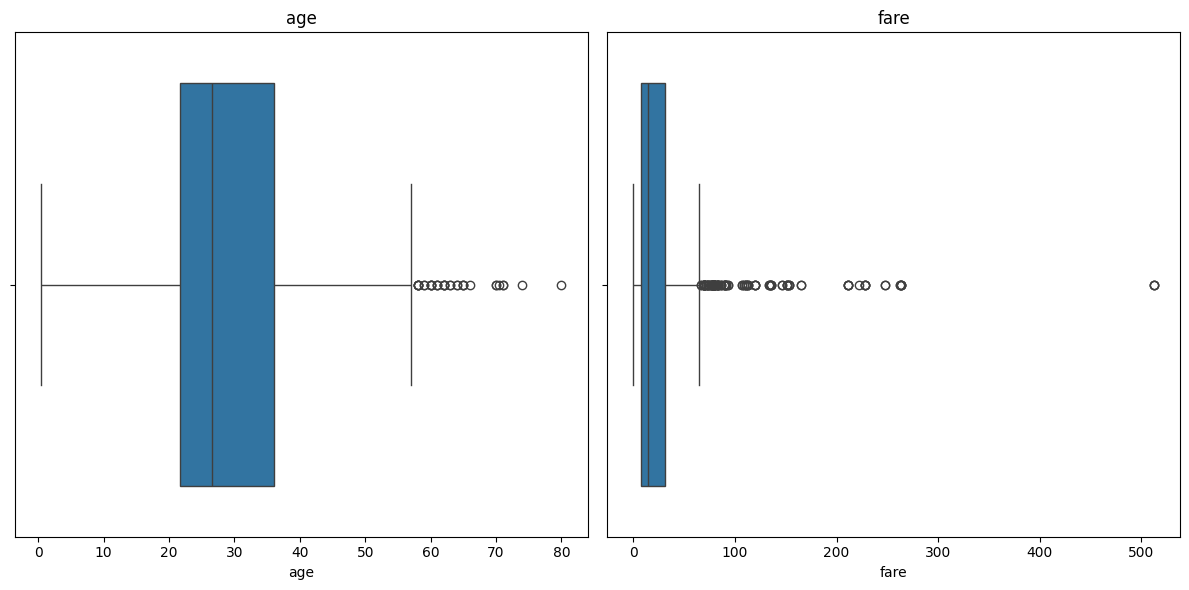

In [53]:
plot_multiple_boxplots(df_titanic_util, numericas)

In [54]:
df_titanic_util_numericas.describe().loc[["std", "mean"]].T

,std,mean
age,13.281103,29.318643
fare,49.693429,32.204208


In [55]:
def variavilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/df_var["mean"]
    return df_var
variavilidad(df_titanic_util_numericas)

,std,mean,CV
age,13.281103,29.318643,0.452992
fare,49.693429,32.204208,1.543073


(2, 2)


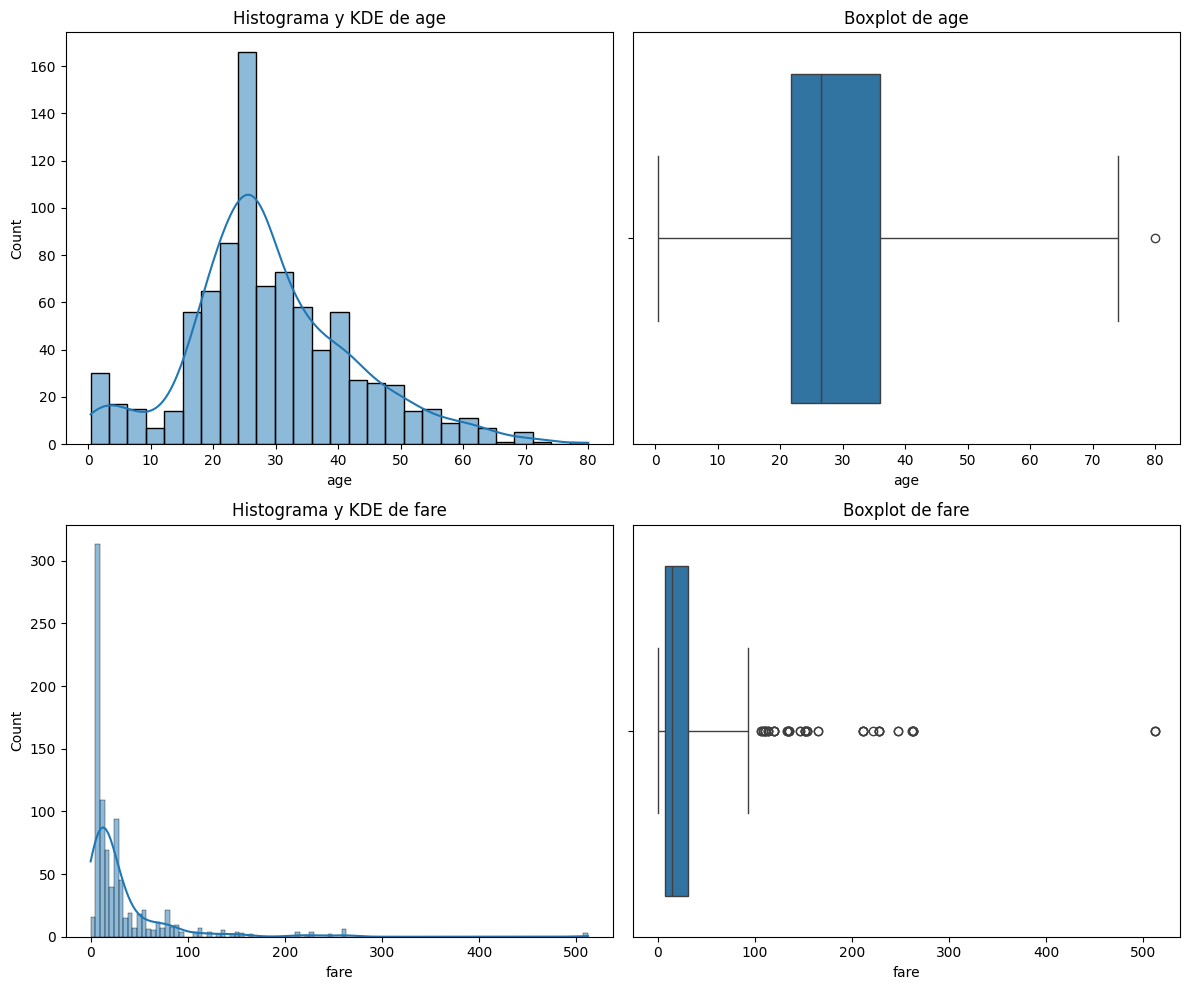

In [56]:
bvt.plot_combined_graphs (df_titanic_util, numericas, 3)